# Data vectors and rescaling
In ML most things are a form of linear .algebra. But if you aren't careful with your data representation you can f up your ML system. Most forms of ML use a measure of either how similar two datapoints are (e.g. dot product) or how far apart they are (e.g., Euclidean norm).  In this notebook I show you how this can give you unexpected results, and why it is critical to rescale or normalize or otherwise maniuplate your raw data to make a linear algebra based ML system work properly.  

Directions: Exectute the cells in this notebook one by one.  Try to understand what the cell is doing before you execute it, then take a look at the output of the cell. There's a narrative here, supplied by the code and results, as you move from top to bottom.  

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy.linalg import norm

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("darkgrid")
sns.set_context("notebook")

In [2]:
# lets get some 🐧 data to work with
penguins = sns.load_dataset("penguins").dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


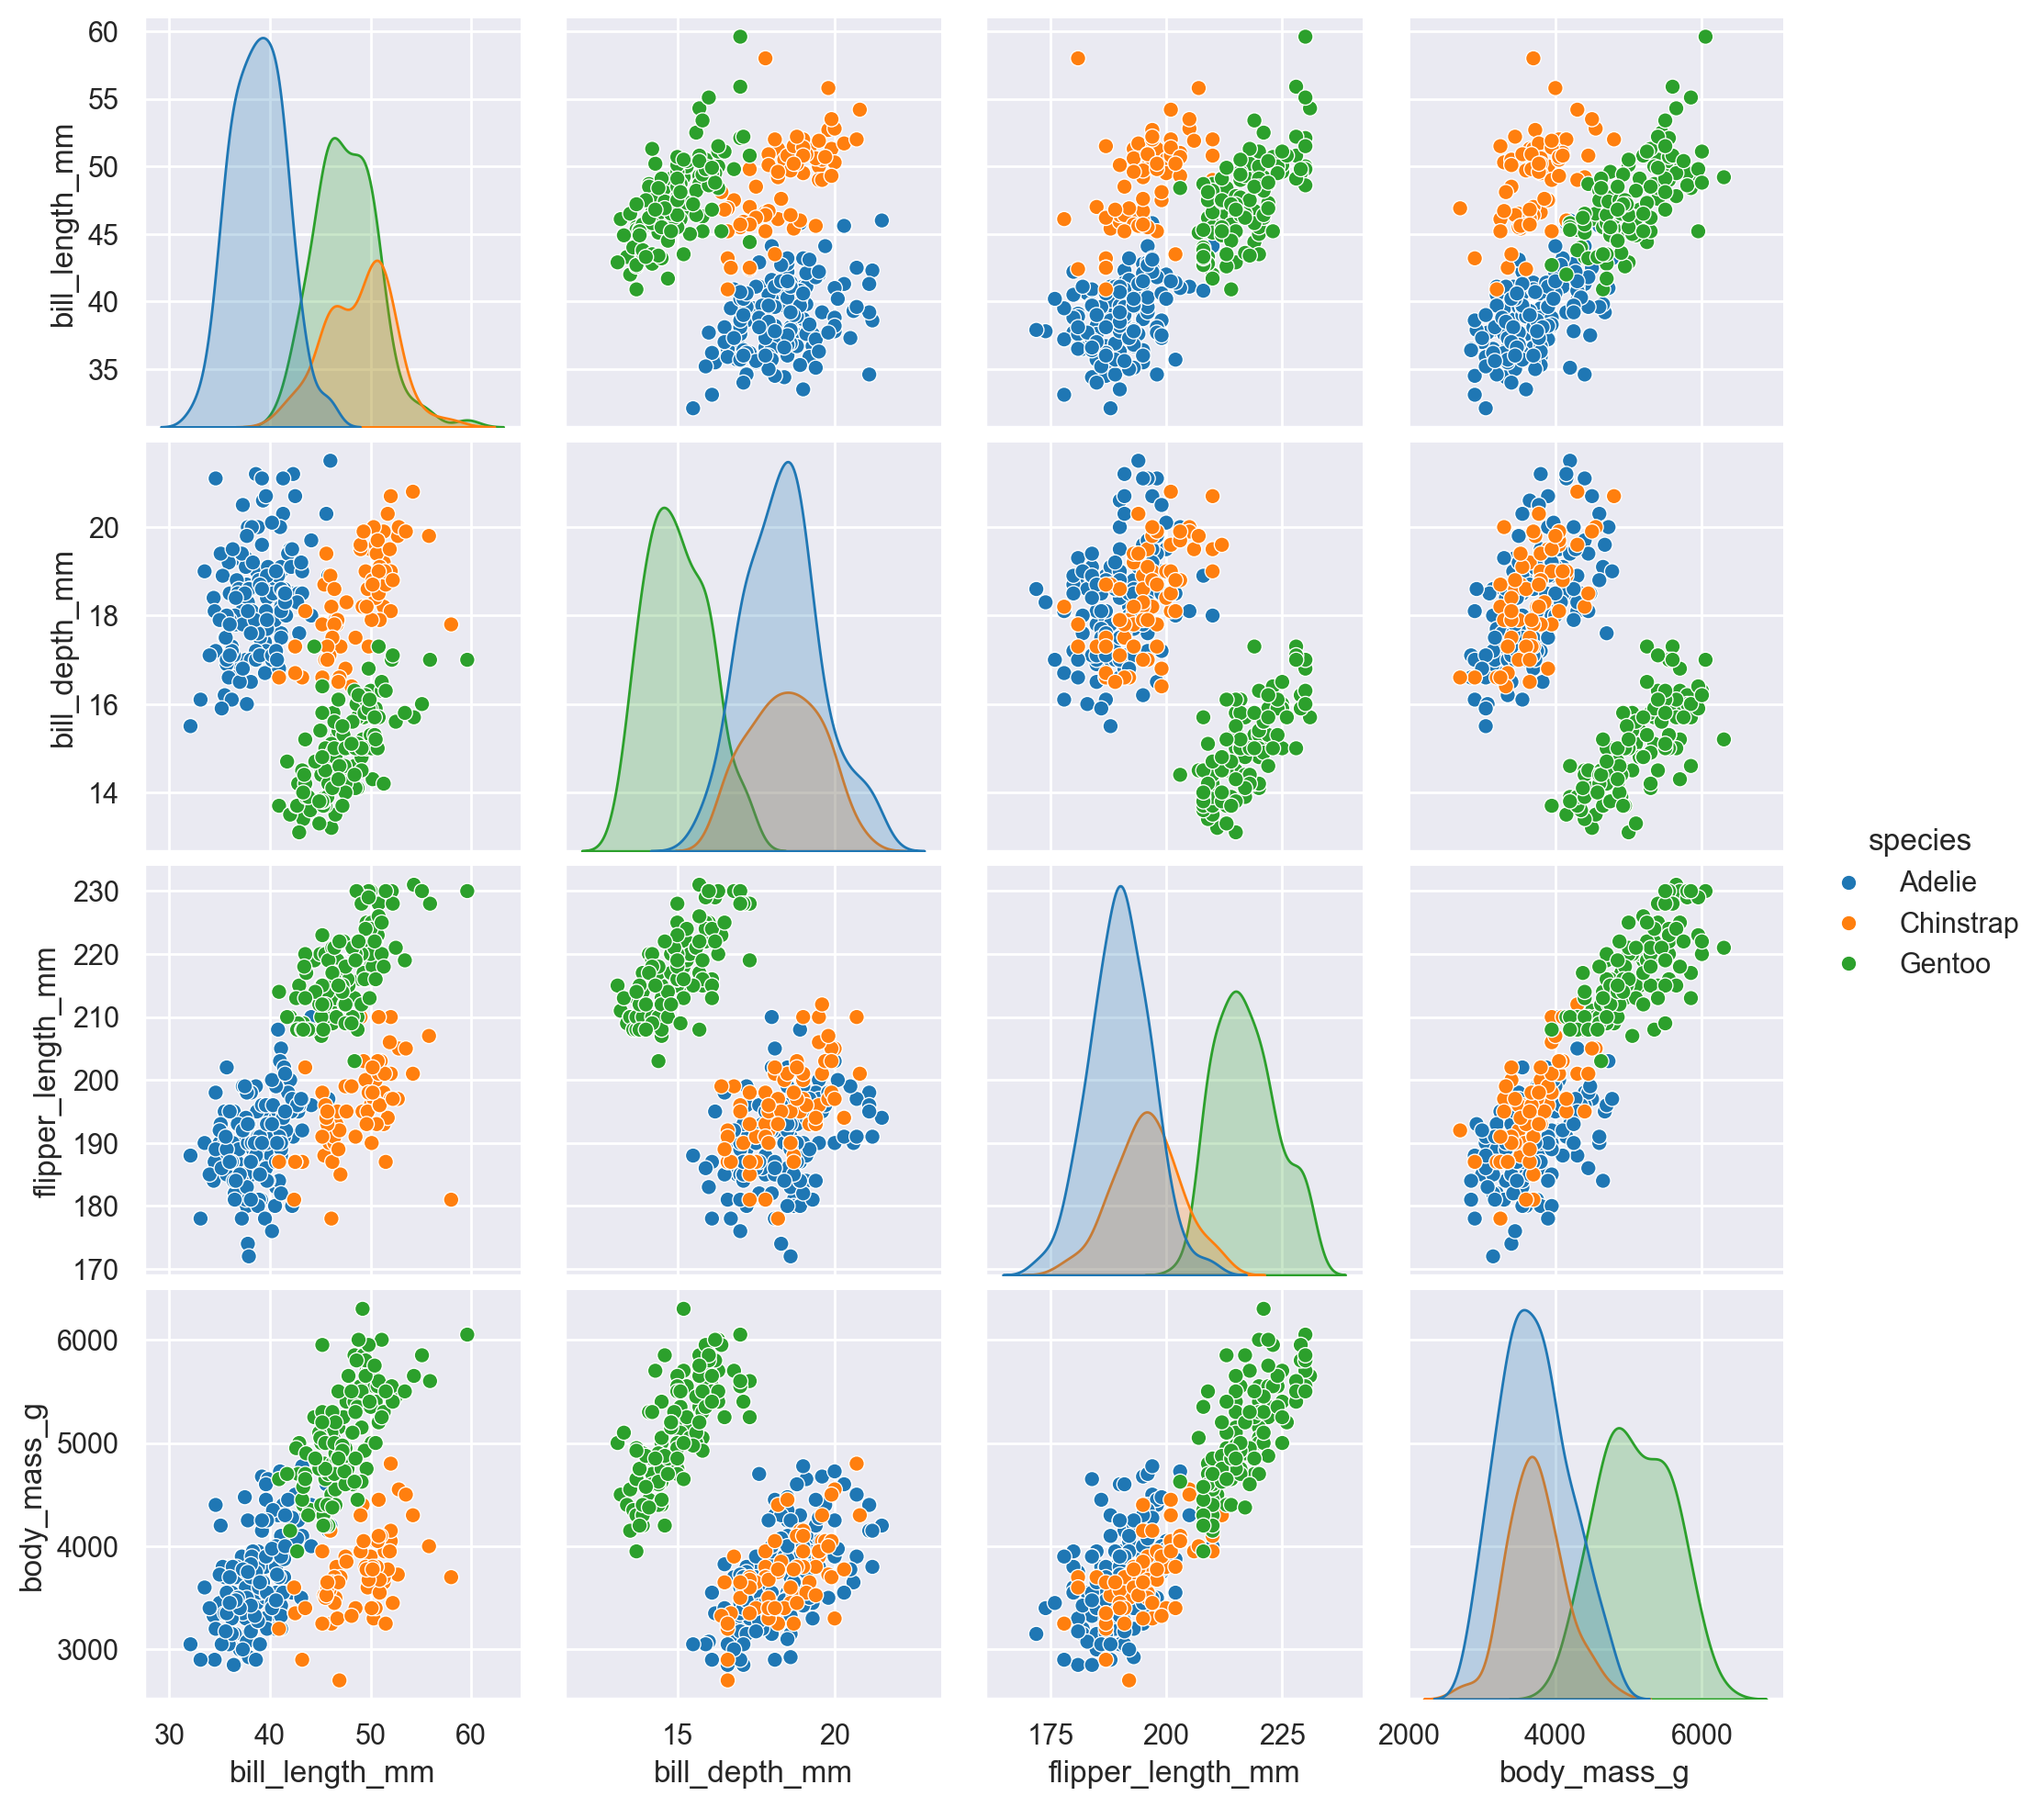

In [3]:
# for functions that return a graphics handle
# putting a ; afterwards supressed the echo
# of the handle to the screen when its the last line
# of a cell
sns.pairplot(penguins, hue='species');

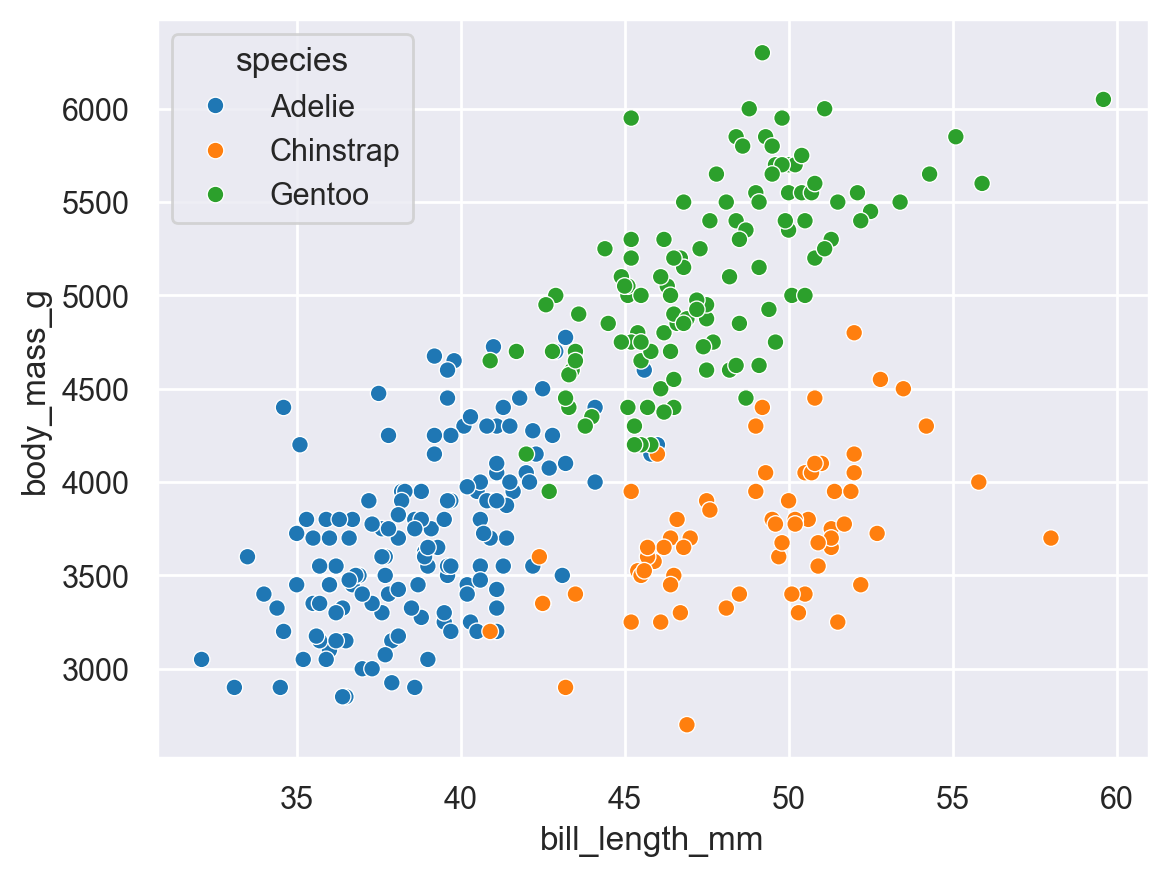

In [4]:
# lets zoom in on that graph in the lower left corner
# it looks like we might be able to tell all the different species 
# just from those two measurements with some success

# what if I plot this with equal axis?
g = sns.scatterplot( penguins, 
                    x='bill_length_mm', 
                    y='body_mass_g', 
                    hue='species')

# axis equal enforces that both x and y axis
# have the same number of values and that those values
# cover the same number of inches on the plot
# uncomment the line below to try!!!

#g.axis('equal');

,bill_length_mm,body_mass_g,species
21,37.7,3600.0,Adelie
50,39.6,3500.0,Adelie
154,51.3,3650.0,Chinstrap


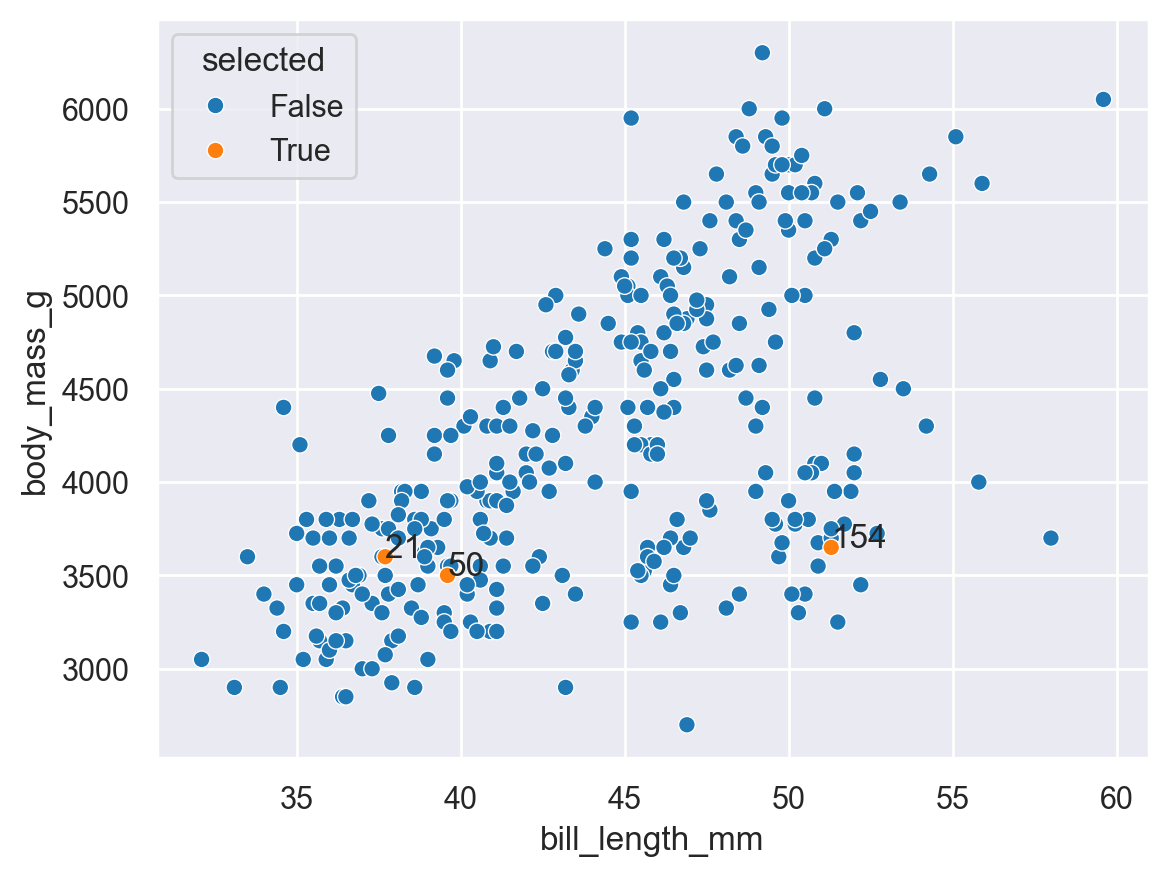

In [5]:
# keep that equal axis picture in mind while we go
# through the stuff below and try to explain what we observe

# here are 3 penguins
selected = [21,50,154]

penguins['selected']=False
penguins.loc[selected,'selected']=True
penguins.sort_values(by='selected',inplace=True)
g = sns.scatterplot(penguins,  
                    x='bill_length_mm', 
                    y='body_mass_g', 
                    hue='selected')

for x in selected:
    plt.annotate(str(x),(penguins.loc[x,'bill_length_mm'],penguins.loc[x,'body_mass_g']))



psub = penguins.loc[selected,
                    ['bill_length_mm','body_mass_g','species']]
psub

In [6]:
peng=penguins.loc[selected,['bill_length_mm','body_mass_g']].values
peng

array([[  37.7, 3600. ],
       [  39.6, 3500. ],
       [  51.3, 3650. ]])

In [7]:
dotval = np.dot(peng[0],peng[1])
normval = norm(peng[0]-peng[1])
print(f'P21 is this similar to P50 <P21,P50>={dotval:.2e}',
      f'\nP21 is this far from P50 ||P21-P50||={normval:.2e}')
print()
dotval = np.dot(peng[0],peng[2])
normval = norm(peng[0]-peng[2])
print(f'P21 is this similar to P154 <P21,P154>={dotval:.2e}',
      f'\nP21 is this far from P154 ||P21-P154||={normval:.2e}')
print()
print('What? Our results say P21 is MORE SIMILAR/CLOSER to P154 than to P50, but our eyeballs looking at the plot say the opposite ')

P21 is this similar to P50 <P21,P50>=1.26e+07 
P21 is this far from P50 ||P21-P50||=1.00e+02

P21 is this similar to P154 <P21,P154>=1.31e+07 
P21 is this far from P154 ||P21-P154||=5.18e+01

What? Our results say P21 is MORE SIMILAR/CLOSER to P154 than to P50, but our eyeballs looking at the plot say the opposite 


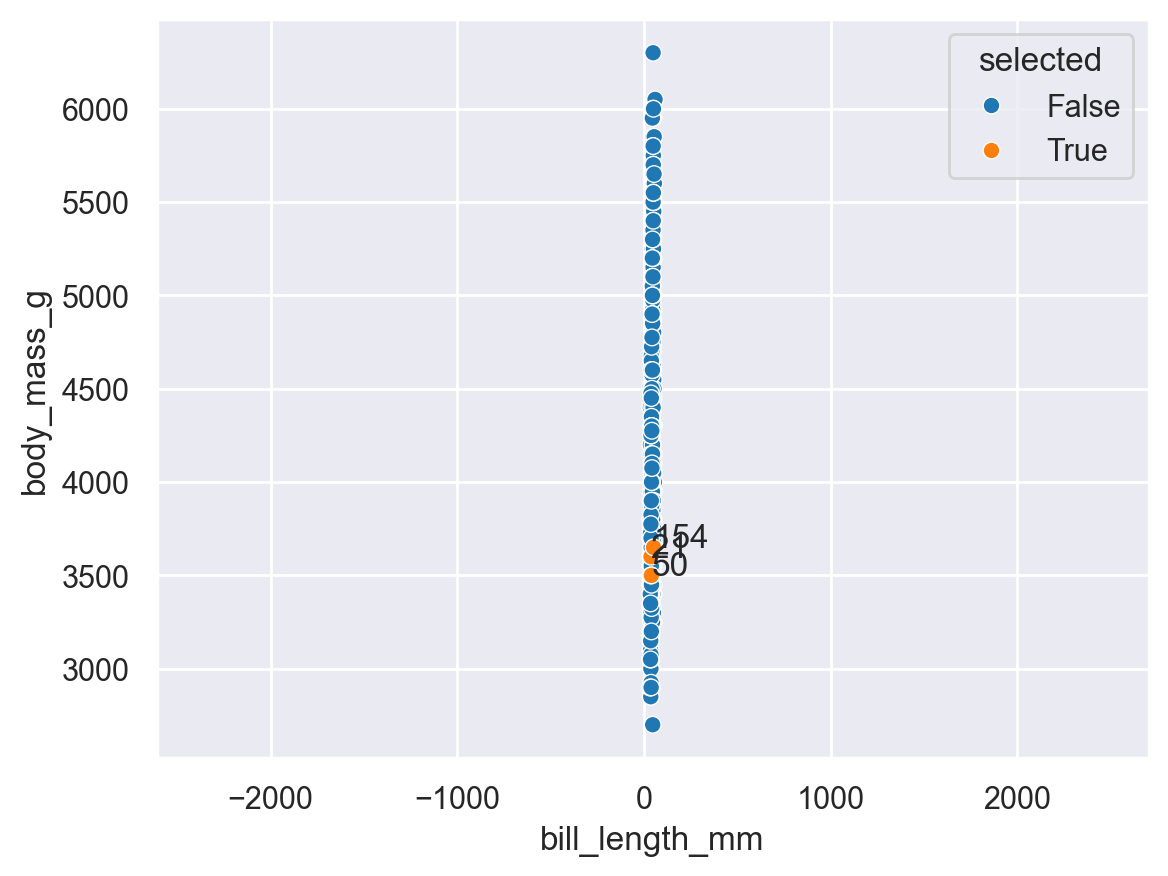

In [10]:
# what if I plot this with equal axis?
# NOW my eyeball results match what the numbers say above!
g = sns.scatterplot(penguins,  
                    x='bill_length_mm', 
                    y='body_mass_g', 
                    hue='selected')

for x in selected:
    plt.annotate(str(x),(penguins.loc[x,'bill_length_mm'],penguins.loc[x,'body_mass_g']))

# uncomment the line below to try!!!
g.axis('equal');

In [11]:
# this happens because the biggest and smallest values on 
# the x-axis values are ~10^1 apart, but the biggest/smallest
# on the y-axis are about two orders of magnitude further apart
# y-axis values dominate in any metric space!!


# StandardScaler is just ONE choice of normalization available
# it z-scores each column of a dataset
# See sklearn docs: https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler

for col in ['bill_length_mm', 'body_mass_g']:
    zscored = StandardScaler().fit_transform(
        penguins[col].values.reshape(-1, 1) 
    ) # reshape because doing it 1 column at a time 
    penguins[col[:-2]+'_standardized'] = zscored
    
penguins[['species', 
          'bill_length__standardized', 'body_mass_standardized']]

,species,bill_length__standardized,body_mass_standardized
0,Adelie,-0.896042,-0.568475
231,Gentoo,0.916995,1.670315
230,Gentoo,-0.566399,0.550920
229,Gentoo,0.514098,1.172806
228,Gentoo,-0.126875,0.239977
...,...,...,...
118,Adelie,-1.518701,-1.065984
343,Gentoo,1.081817,1.483749
21,Adelie,-1.152431,-0.755041
154,Chinstrap,1.338206,-0.692852


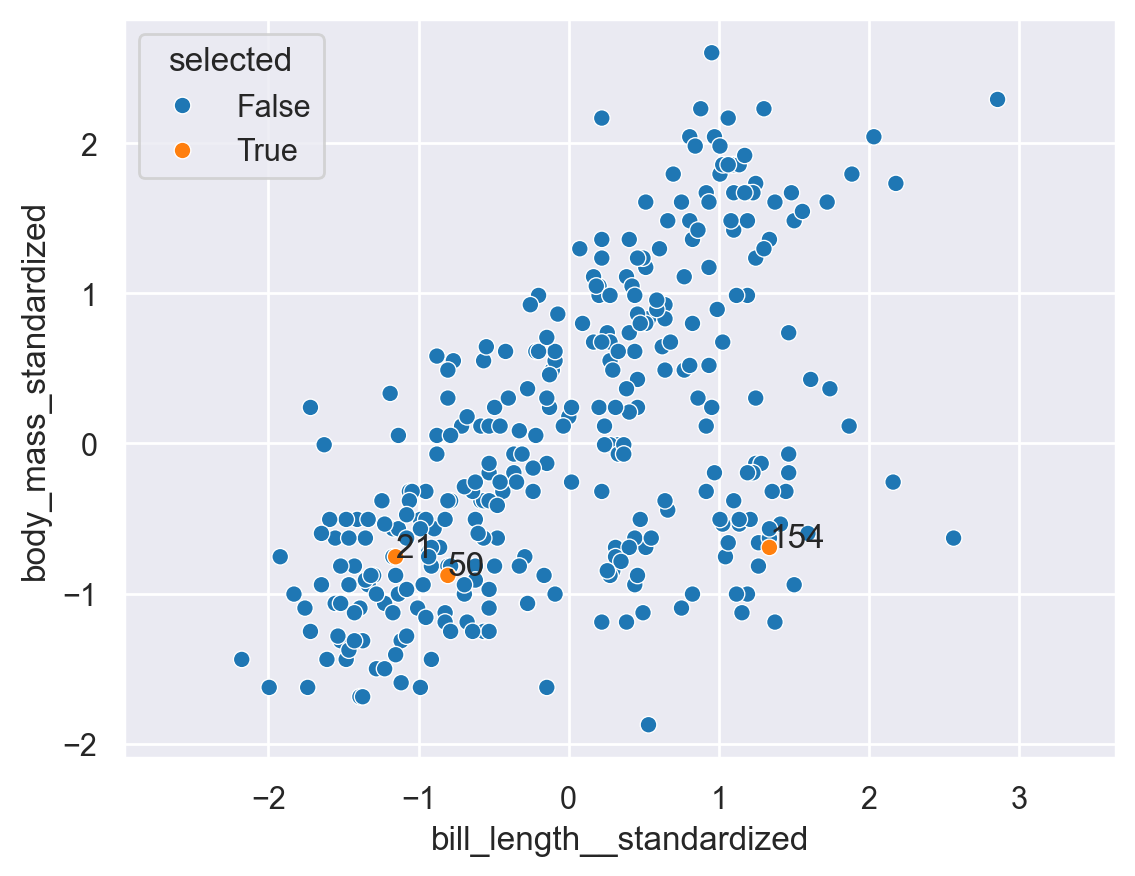

In [12]:
# after z scoring the results are now turned into 
# the same order of magnitude on each of the axes
# with values that are in terms of number of stddeviations
# a particular datapoint is away from the mean of that measurement
g = sns.scatterplot(penguins,  
                    x='bill_length__standardized', 
                    y='body_mass_standardized', 
                    hue='selected')

for x in selected:
    plt.annotate(str(x),(penguins.loc[x,'bill_length__standardized'],penguins.loc[x,'body_mass_standardized']))

# We force equal axis
g.axis('equal');

In [13]:
peng=penguins.loc[selected,
                  ['bill_length__standardized','body_mass_standardized']].values
peng

array([[-1.15243097, -0.75504059],
       [-0.80447436, -0.87941779],
       [ 1.33820581, -0.69285199]])

In [14]:
dotval = np.dot(peng[0],peng[1])
normval = norm(peng[0]-peng[1])
print(f'P21 is this similar to P50 <P21,P50>={dotval:.2e}',
      f'\nP21 is this far from P50 ||P21-P50||={normval:.2e}')
print()
dotval = np.dot(peng[0],peng[2])
normval = norm(peng[0]-peng[2])
print(f'P21 is this similar to P154 <P21,P154>={dotval:.2e}',
      f'\nP21 is this far from P154 ||P21-P154||={normval:.2e}')
print()
print('Now results match what we expected in the first place ')

P21 is this similar to P50 <P21,P50>=1.59e+00 
P21 is this far from P50 ||P21-P50||=3.70e-01

P21 is this similar to P154 <P21,P154>=-1.02e+00 
P21 is this far from P154 ||P21-P154||=2.49e+00

Now results match what we expected in the first place 
